In [201]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib_inline.backend_inline


from matplotlib import rc

import matplotlib as mpl

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams["font.family"] = "Helvetica"

rc('text', usetex=False)

In [202]:
mi_range = [2**(x) for x in range(-10, 0)]

labels = [-np.log2(x) for x in mi_range]
# print(labels)

c_range = [1/(2*mi) for mi in mi_range]

In [203]:
# c_range.reverse()
c_range

[512.0, 256.0, 128.0, 64.0, 32.0, 16.0, 8.0, 4.0, 2.0, 1.0]

In [204]:
d=pickle.load(open(f'data/wine_red_exact_mses.pkl', 'rb'))

In [205]:
for C in c_range:
    d = pickle.load(open(f'data/C={C}_wine_white_exact_mses.pkl', 'rb'))[C]
    print(C, np.mean(d[0]), np.mean(d[1]))

FileNotFoundError: [Errno 2] No such file or directory: 'data/C=512.0_wine_white_exact_mses.pkl'

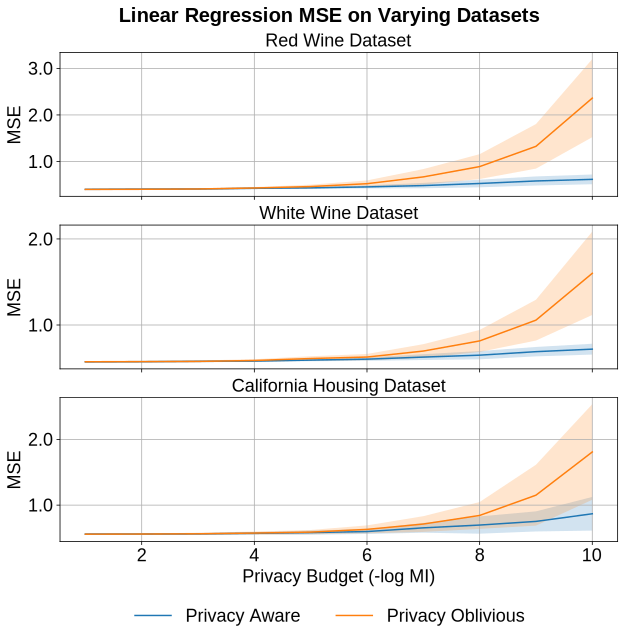

In [206]:
names = ['Red Wine', 'White Wine', 'California Housing']
baselines = [0.5690247717229252, 0.3900251439639549, 0.5558915986952447]
global_handles, global_labels = [], []
fig, axes = plt.subplots(3, 1, figsize=(10,9), sharex=True)

for data_ind, data in enumerate(['wine_red', 'wine_white', 'housing']):

    ax = axes[data_ind]
    mi_range = [2**(x) for x in range(-10, 0)]

    labels = [-np.log2(x) for x in mi_range]

    c_range = [1/(2*mi) for mi in mi_range]
    mses = pickle.load(open(f'data/{data.lower()}_exact_mses.pkl', 'rb'))

    xs = []
    priv_aware = []
    priv_obl = []
    priv_aware_bands = []
    priv_obl_bands = []

    for i, c in enumerate(c_range):
        xs.append(labels[i])
        
        aware_std = np.std(mses[c][1], ddof=1)
        aware_mean = np.average(mses[c][1])
        
        obl_std = np.std(mses[c][0], ddof=1)
        obl_mean = np.average(mses[c][0])
        
        priv_aware.append(aware_mean)
        priv_obl.append(obl_mean)
        priv_aware_bands.append((aware_mean-aware_std, aware_mean+aware_std))
        priv_obl_bands.append((obl_mean-obl_std, obl_mean+obl_std))

    aware_lower = [k[0] for k in priv_aware_bands]
    aware_upper = [k[1] for k in priv_aware_bands]
    obl_lower = [k[0] for k in priv_obl_bands]
    obl_upper = [k[1] for k in priv_obl_bands]
    where_mask = np.ones_like(xs, dtype=bool)

    line1 = ax.plot(xs, priv_aware, label='Privacy Aware')

    ax.fill_between(xs, aware_lower, aware_upper, where=where_mask, alpha=0.2, linewidth=0)
    
    line2 = ax.plot(xs, priv_obl, label='Privacy Oblivious')
    ax.fill_between(xs, obl_lower, obl_upper, where=where_mask, alpha=0.2, linewidth=0)

    if data_ind == 0:
        for line in [line1, line2]:
            global_handles.append(line[0])
            global_labels.append(line[0].get_label())
    ax.grid(True)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f"{val:.1f}"))

    ax.tick_params(axis='both', labelsize=18)
    ax.set_title(f"{names[data_ind]} Dataset", fontsize=18, fontweight='normal')
    ax.set_ylabel("MSE", fontsize=18)

ax.set_xlabel("Privacy Budget (-log MI)", fontsize=18)

# fig.subplots_adjust(bottom=0.18)

leg=fig.legend(
    handles=global_handles,
    labels=global_labels,
    ncol = 4,
    bbox_to_anchor=(0.5, -0.03),
    loc='lower center',
    fontsize=18,
    frameon=False
)
title = fig.suptitle("Linear Regression MSE on Varying Datasets", fontsize=20, fontweight="bold", y=0.95)
fig.canvas.draw()
fig.savefig("figs/regression_exact_lams.pdf", bbox_inches="tight", bbox_extra_artists=(leg, title), pad_inches=0.04)

# fig.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

# plt.savefig('figs/regression_exact_lams.svg')

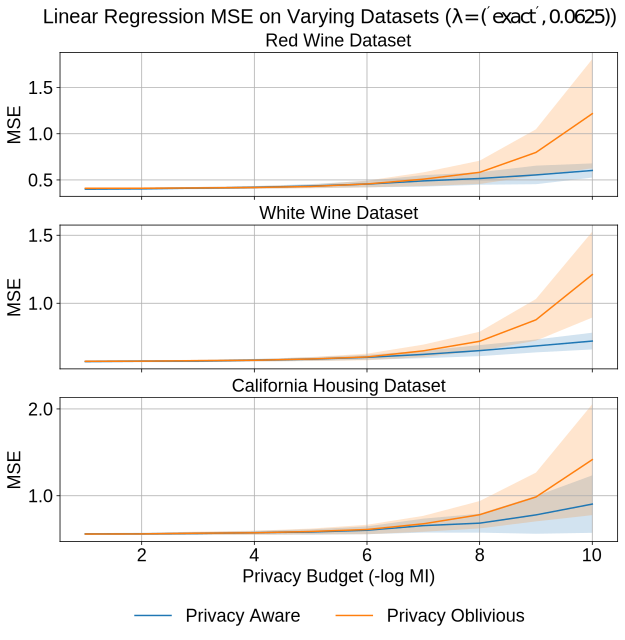

In [220]:
names = ['Red Wine', 'White Wine', 'California Housing']
baselines = [0.5690247717229252, 0.3900251439639549, 0.5558915986952447]
global_handles, global_labels = [], []
fig, axes = plt.subplots(3, 1, figsize=(10,9), sharex=True)

lam = ('exact', 0.0625)
for data_ind, data in enumerate(['wine_red', 'wine_white', 'housing']):

    ax = axes[data_ind]
    mi_range = [2**(x) for x in range(-10, 0)]

    labels = [-np.log2(x) for x in mi_range]

    c_range = [1/(2*mi) for mi in mi_range]
    mses = pickle.load(open(f'data/{data.lower()}_{lam}_mses.pkl', 'rb'))

    xs = []
    priv_aware = []
    priv_obl = []
    priv_aware_bands = []
    priv_obl_bands = []

    for i, c in enumerate(c_range):
        xs.append(labels[i])
        
        aware_std = np.std(mses[c][1], ddof=1)
        aware_mean = np.average(mses[c][1])
        
        obl_std = np.std(mses[c][0], ddof=1)
        obl_mean = np.average(mses[c][0])
        
        priv_aware.append(aware_mean)
        priv_obl.append(obl_mean)
        priv_aware_bands.append((aware_mean-aware_std, aware_mean+aware_std))
        priv_obl_bands.append((obl_mean-obl_std, obl_mean+obl_std))

    aware_lower = [k[0] for k in priv_aware_bands]
    aware_upper = [k[1] for k in priv_aware_bands]
    obl_lower = [k[0] for k in priv_obl_bands]
    obl_upper = [k[1] for k in priv_obl_bands]
    where_mask = np.ones_like(xs, dtype=bool)

    line1 = ax.plot(xs, priv_aware, label='Privacy Aware')

    ax.fill_between(xs, aware_lower, aware_upper, where=where_mask, alpha=0.2, linewidth=0)
    
    line2 = ax.plot(xs, priv_obl, label='Privacy Oblivious')
    ax.fill_between(xs, obl_lower, obl_upper, where=where_mask, alpha=0.2, linewidth=0)

    if data_ind == 0:
        for line in [line1, line2]:
            global_handles.append(line[0])
            global_labels.append(line[0].get_label())
    ax.grid(True)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f"{val:.1f}"))

    ax.tick_params(axis='both', labelsize=18)
    ax.set_title(f"{names[data_ind]} Dataset", fontsize=18, fontweight='normal')
    ax.set_ylabel("MSE", fontsize=18)

ax.set_xlabel("Privacy Budget (-log MI)", fontsize=18)

# fig.subplots_adjust(bottom=0.18)

leg=fig.legend(
    handles=global_handles,
    labels=global_labels,
    ncol = 4,
    bbox_to_anchor=(0.5, -0.03),
    loc='lower center',
    fontsize=18,
    frameon=False
)
title = fig.suptitle(f"Linear Regression MSE on Varying Datasets ($\lambda={lam}$)", fontsize=20, fontweight="bold", y=0.95)
fig.canvas.draw()
fig.savefig(f"figs/regression_{lam}_lams.pdf", bbox_inches="tight", bbox_extra_artists=(leg, title), pad_inches=0.04)

# fig.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

# plt.savefig('figs/regression_exact_lams.svg')

In [134]:
np.array(d2[0]) - np.array(d1[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])